In [ ]:
# Import the drive module from google.colab
from google.colab import drive

# Mount the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Training Dataset
import pandas as pd

# Load the Excel file
file_path = '/content/drive/My Drive/SB ML Project Dataset 2/15MPa Data_Q2.xlsx'

# Read the sheets
df_train = pd.read_excel(file_path)  # First sheet

# We can now use combined_data for further processing or analysis
print(df_train.head())  # Display the first few rows of the combined dataframe
print(df_train.tail())

    t   P  G        T
0  60  15  1  7137.86
1  60  15  2  6838.09
2  60  15  3  6664.98
3  60  15  4  6552.86
4  60  15  5  6447.22
         t   P       G      T
367495  60  30  122496  300.0
367496  60  30  122497  300.0
367497  60  30  122498  300.0
367498  60  30  122499  300.0
367499  60  30  122500  300.0


In [ ]:
len(df_train)

367500

In [ ]:
# Check for null values in each column
null_counts = df_train.isnull().sum()
print("Null values in each column:\n", null_counts)

# Check the data types of each column
data_types = df_train.dtypes
print("\nData types of each column:\n", data_types)


Null values in each column:
 t    0
P    0
G    0
T    0
dtype: int64

Data types of each column:
 t      int64
P      int64
G      int64
T    float64
dtype: object


Importing test set

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/drive/My Drive/SB ML Project Dataset 2/P=25 and 35 (2 sheet)_Test2.xlsx'

# Read the sheets
sheet1 = pd.read_excel(file_path, sheet_name=0)  # First sheet
sheet2 = pd.read_excel(file_path, sheet_name=1)  # Second sheet

# Concatenate the sheets
combined_data = pd.concat([sheet1, sheet2], ignore_index=True)

# We can now use combined_data for further processing or analysis
print(combined_data.head())  # Display the first few rows of the combined dataframe

   t=60   P  G        T
0    60  25  1  6245.50
1    60  25  2  6243.26
2    60  25  3  6241.65
3    60  25  4  6240.83
4    60  25  5  6239.70


In [ ]:
sheet1.head()

,t=60,P,G,T
0,60,25,1,6245.50
1,60,25,2,6243.26
2,60,25,3,6241.65
3,60,25,4,6240.83
4,60,25,5,6239.70


In [ ]:
sheet2.head()

,t=60,P,G,T
0,60,35,1,5923.48
1,60,35,2,5889.14
2,60,35,3,5855.25
3,60,35,4,5826.97
4,60,35,5,5812.39


In [ ]:
df_test=combined_data

In [ ]:
# Assuming df_test is your DataFrame
df_test = df_test.rename(columns={'t=60': 't'})

# Print the DataFrame to verify the change
print(df_test.head())

    t   P  G        T
0  60  25  1  6245.50
1  60  25  2  6243.26
2  60  25  3  6241.65
3  60  25  4  6240.83
4  60  25  5  6239.70


In [ ]:
X_test=df_test[['t', 'P', 'G']]
y_test=df_test['T']

## Applying Decision Tree on entire training data

In [ ]:
#Training Entire Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


X = df_train[['t', 'P', 'G']]
y = df_train['T']

# Create and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
len(y_pred)

245000

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / np.mean(y_test)
print("Normalized RMSE (NRMSE):", nrmse)

# Calculate Normalized Mean Absolute Error (NMAE)
nmae = mae / np.mean(y_test)
print("Normalized MAE (NMAE):", nmae)

# Calculate Minimum Absolute Error
min_abs_error = np.min(np.abs(y_test - y_pred))
print("Minimum Absolute Error:", min_abs_error)

# Calculate Maximum Absolute Error
max_abs_error = np.max(np.abs(y_test - y_pred))
print("Maximum Absolute Error:", max_abs_error)

# Calculate Pearson Correlation Coefficient
correlation, _ = pearsonr(y_test, y_pred)
print("Correlation Coefficient:", correlation)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R^2 (Coefficient of Determination):", r_squared)

# Optionally, to visualize the importance of each feature
print("Feature importances:", model.feature_importances_)


Mean Squared Error: 1559.5784432817682
Mean Absolute Error: 8.36530616734694
Root Mean Squared Error (RMSE): 39.49149836713933
Normalized RMSE (NRMSE): 0.057309205045456224
Normalized MAE (NMAE): 0.012139550694065818
Minimum Absolute Error: 0.0
Maximum Absolute Error: 1123.3799999999997
Correlation Coefficient: 0.9994254772948418
R^2 (Coefficient of Determination): 0.9988380446113624
Feature importances: [0.         0.00288705 0.99711295]


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Optionally, to visualize the importance of each feature
print("Feature importances:", model.feature_importances_)

Mean Absolute Percentage Error (MAPE): 0.6290586804382045
Feature importances: [0.         0.00288705 0.99711295]


In [ ]:
y_pred[:5]

array([6477.65, 6476.  , 6475.26, 6473.75, 6469.03])

In [ ]:
Random Forest Performance Metrics

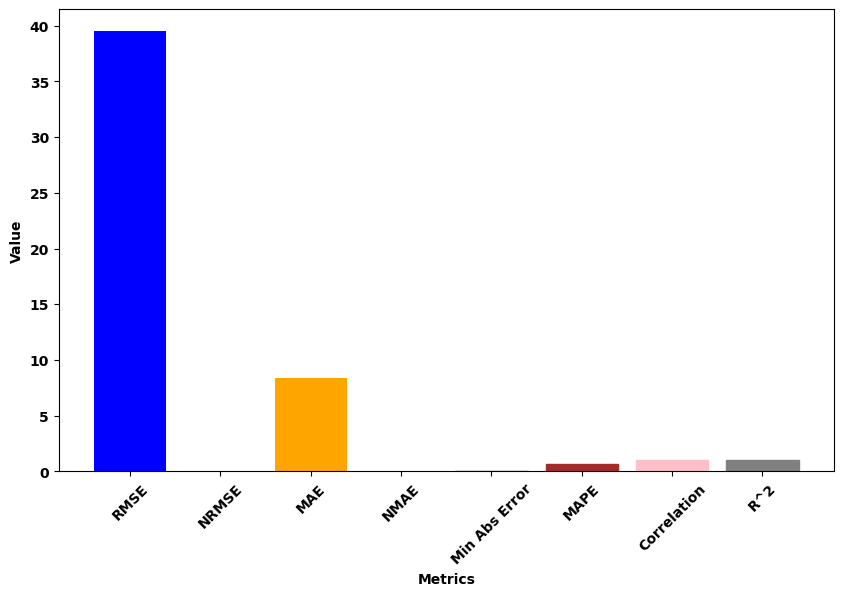

In [ ]:
# Decision Tree
import matplotlib.pyplot as plt

# Your actual values for the metrics
metrics_values = {
    'RMSE': 39.49149836713933,
    'NRMSE': 0.057309205045456224,
    'MAE': 8.36530616734694,
    'NMAE': 0.012139550694065818,
    'Min Abs Error': 0.0,
    'MAPE': 0.6290586804382045,
    'Correlation': 0.9994254772948418,
    'R^2': 0.9988380446113624
}

# Names and values
names = list(metrics_values.keys())
values = list(metrics_values.values())

# Color list for the bars, based on the image provided
colors = ['blue', 'red', 'orange', 'yellow', 'green', 'purple', 'pink', 'gray']

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed
bar_plot = plt.bar(names, values, color=colors)
plt.xlabel('Metrics', fontweight='bold')  # Make x-axis label bold
plt.ylabel('Value', fontweight='bold')   # Make y-axis label bold
#plt.title('Decision Tree Performance Metrics')
  # Set the y-axis limit from 0 to 1 as in the image

# Rotate x-axis labels
plt.xticks(rotation=45, fontweight='bold')   # Rotate labels to 45 degrees for better visibility
plt.yticks(range(0, int(max(values)) + 5, 5), fontweight='bold')

# To change specific bars' colors to match the example
bar_plot[4].set_color('green')  # Min Abs Error
bar_plot[5].set_color('brown')    # Max Abs Error
bar_plot[6].set_color('pink')   # Correlation
bar_plot[7].set_color('gray')   # R^2

plt.show()


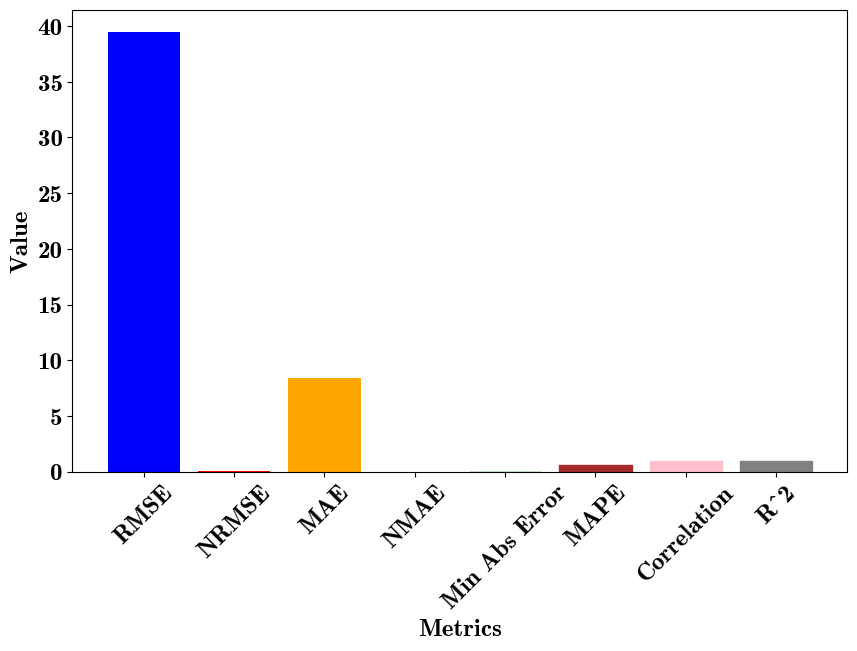

In [ ]:
import matplotlib.pyplot as plt

# Your actual values for the metrics
metrics_values = {
    'RMSE': 39.49149836713933,
    'NRMSE': 0.057309205045456224,
    'MAE': 8.36530616734694,
    'NMAE': 0.012139550694065818,
    'Min Abs Error': 0.0,
    'MAPE': 0.6290586804382045,
    'Correlation': 0.9994254772948418,
    'R^2': 0.9988380446113624
}

# Names and values
names = list(metrics_values.keys())
values = list(metrics_values.values())

# Color list for the bars, based on the image provided
colors = ['blue', 'red', 'orange', 'yellow', 'green', 'purple', 'pink', 'gray']

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed
bar_plot = plt.bar(names, values, color=colors)

# Setting font properties for labels
label_font_properties = {'family': 'cmb10', 'size': 18, 'weight': 'bold'}

plt.xlabel('Metrics', fontdict=label_font_properties)  # Apply bold to x-axis label
plt.ylabel('Value', fontdict=label_font_properties)    # Apply bold to y-axis label

# Setting font properties for ticks (not bold)
tick_font_properties = {'family': 'cmb10', 'size': 18, 'weight': 'normal'}

# Rotate x-axis labels and set font properties
plt.xticks(rotation=45, fontproperties=tick_font_properties)  # Apply font properties to x-tick labels
plt.yticks(range(0, int(max(values)) + 5, 5), fontproperties=tick_font_properties)  # Apply font properties to y-tick labels

# To change specific bars' colors to match the example
bar_plot[4].set_color('green')  # Min Abs Error
bar_plot[5].set_color('brown')  # MAPE
bar_plot[6].set_color('pink')   # Correlation
bar_plot[7].set_color('gray')   # R^2

plt.show()


In [ ]:
#Copying X_test
df_answer=X_test.copy()

In [ ]:
# Add the predicted values as a new column to df_combined_test
df_answer['Predicted T'] = y_pred

# Display the first few rows to verify the new dataframe
print(df_answer.head())
print(df_answer.tail())

# Optionally, check the shape of the new dataframe to ensure the column has been added correctly
print("New DataFrame shape:", df_answer.shape)


    t   P  G  Predicted T
0  60  25  1      6477.65
1  60  25  2      6476.00
2  60  25  3      6475.26
3  60  25  4      6473.75
4  60  25  5      6469.03
         t   P       G  Predicted T
244995  60  35  122496        300.0
244996  60  35  122497        300.0
244997  60  35  122498        300.0
244998  60  35  122499        300.0
244999  60  35  122500        300.0
New DataFrame shape: (245000, 4)


Exporting as excel file

In [ ]:
!pip install openpyxl

In [ ]:
# Save the DataFrame to an Excel file
df_answer.to_excel('df_answer_Project2_DecisionTree.xlsx', sheet_name='Predicted Results', index=False)

print("DataFrame is written to Excel file successfully.")

DataFrame is written to Excel file successfully.


## Applying Random Forest, n_estimator=20

In [ ]:
#Training Entire Dataset
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


X = df_train[['t', 'P', 'G']]
y = df_train['T']

# Create and train the Random Forest model
model = RandomForestRegressor(random_state=42, n_estimators=20)  # Default number of trees is 100
model.fit(X, y)

RandomForestRegressor(n_estimators=20, random_state=42)

In [ ]:
X_test.head()

,t,P,G
0,60,25,1
1,60,25,2
2,60,25,3
3,60,25,4
4,60,25,5


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
len(y_pred)

245000

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / np.mean(y_test)
print("Normalized RMSE (NRMSE):", nrmse)

# Calculate Normalized Mean Absolute Error (NMAE)
nmae = mae / np.mean(y_test)
print("Normalized MAE (NMAE):", nmae)

# Calculate Minimum Absolute Error
min_abs_error = np.min(np.abs(y_test - y_pred))
print("Minimum Absolute Error:", min_abs_error)

# Calculate Maximum Absolute Error
max_abs_error = np.max(np.abs(y_test - y_pred))
print("Maximum Absolute Error:", max_abs_error)

# Calculate Pearson Correlation Coefficient
correlation, _ = pearsonr(y_test, y_pred)
print("Correlation Coefficient:", correlation)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R^2 (Coefficient of Determination):", r_squared)

# Optionally, to visualize the importance of each feature
print("Feature importances:", model.feature_importances_)


Mean Squared Error: 1848.8597387095454
Mean Absolute Error: 9.271969142653061
Root Mean Squared Error (RMSE): 42.99836902383095
Normalized RMSE (NRMSE): 0.06239829960610893
Normalized MAE (NMAE): 0.01345528031961423
Minimum Absolute Error: 0.0
Maximum Absolute Error: 1515.8914999999997
Correlation Coefficient: 0.9993176291588665
R^2 (Coefficient of Determination): 0.998622517164505
Feature importances: [0.        0.0023194 0.9976806]


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Optionally, to visualize the importance of each feature
print("Feature importances:", model.feature_importances_)

Mean Absolute Percentage Error (MAPE): 0.6767298178555035
Feature importances: [0.        0.0023194 0.9976806]


In [ ]:
y_pred[:5]

array([6543.2285, 6494.487 , 6475.301 , 6473.731 , 6470.11  ])

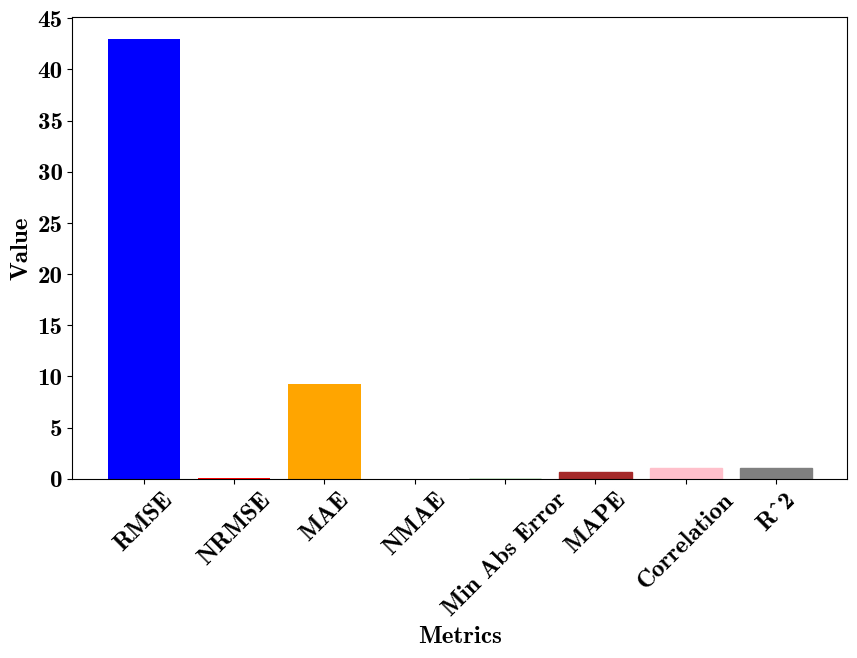

In [ ]:
import matplotlib.pyplot as plt

# Your actual values for the metrics
metrics_values = {
    'RMSE': 42.99836902383095,
    'NRMSE': 0.06239829960610893,
    'MAE': 9.271969142653061,
    'NMAE': 0.01345528031961423,
    'Min Abs Error': 0.0,
    'MAPE': 0.6767298178555035,
    'Correlation': 0.9993176291588665,
    'R^2': 0.998622517164505
}

# Names and values
names = list(metrics_values.keys())
values = list(metrics_values.values())

# Color list for the bars, based on the image provided
colors = ['blue', 'red', 'orange', 'yellow', 'green', 'purple', 'pink', 'gray']

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed
bar_plot = plt.bar(names, values, color=colors)

# Setting font properties for labels
label_font_properties = {'family': 'cmb10', 'size': 18, 'weight': 'bold'}

plt.xlabel('Metrics', fontdict=label_font_properties)  # Apply bold to x-axis label
plt.ylabel('Value', fontdict=label_font_properties)    # Apply bold to y-axis label

# Setting font properties for ticks (not bold)
tick_font_properties = {'family': 'cmb10', 'size': 18, 'weight': 'normal'}

# Rotate x-axis labels and set font properties
plt.xticks(rotation=45, fontproperties=tick_font_properties)  # Apply font properties to x-tick labels
plt.yticks(range(0, int(max(values)) + 5, 5), fontproperties=tick_font_properties)  # Apply font properties to y-tick labels

# To change specific bars' colors to match the example
bar_plot[4].set_color('green')  # Min Abs Error
bar_plot[5].set_color('brown')  # MAPE
bar_plot[6].set_color('pink')   # Correlation
bar_plot[7].set_color('gray')   # R^2

plt.show()


In [ ]:
#Copying X_test
df_answer=X_test.copy()

In [ ]:
# Add the predicted values as a new column to df_combined_test
df_answer['Predicted T'] = y_pred

# Display the first few rows to verify the new dataframe
print(df_answer.head())
print(df_answer.tail())

# Optionally, check the shape of the new dataframe to ensure the column has been added correctly
print("New DataFrame shape:", df_answer.shape)


    t   P  G  Predicted T
0  60  25  1    6543.2285
1  60  25  2    6494.4870
2  60  25  3    6475.3010
3  60  25  4    6473.7310
4  60  25  5    6470.1100
         t   P       G  Predicted T
244995  60  35  122496        300.0
244996  60  35  122497        300.0
244997  60  35  122498        300.0
244998  60  35  122499        300.0
244999  60  35  122500        300.0
New DataFrame shape: (245000, 4)


Exporting as excel file

In [ ]:
!pip install openpyxl

In [ ]:
# Save the DataFrame to an Excel file
df_answer.to_excel('df_answer_Project2_RandomForest.xlsx', sheet_name='Predicted Results', index=False)

print("DataFrame is written to Excel file successfully.")

DataFrame is written to Excel file successfully.


## Comparison Figures

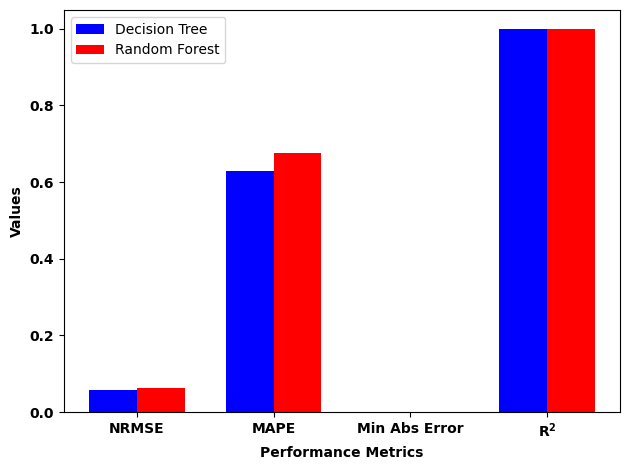

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['NRMSE', 'MAPE', 'Min Abs Error',  r'$\mathbf{R^2}$']
dt_values = [0.0573, 0.6291, 0.0, 0.9988]  # Decision Tree values
rf_values = [0.0624, 0.6767, 0.0, 0.9986]  # Random Forest values

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dt_values, width, label='Decision Tree',color='blue')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest',color='red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Values', fontweight='bold')
ax.set_xlabel('Performance Metrics', fontweight='bold')
#ax.set_title('Comparison of Decision Tree and Random Forest', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontweight='bold')

# Make y-axis labels bold
ax.set_yticks(np.linspace(0, 1, num=6))  # Set y-ticks to show from 0 to 1
ax.set_yticklabels(['{:.1f}'.format(i) for i in np.linspace(0, 1, num=6)], fontweight='bold')

ax.legend(fontsize='medium', title_fontsize='medium')

fig.tight_layout()

plt.show()


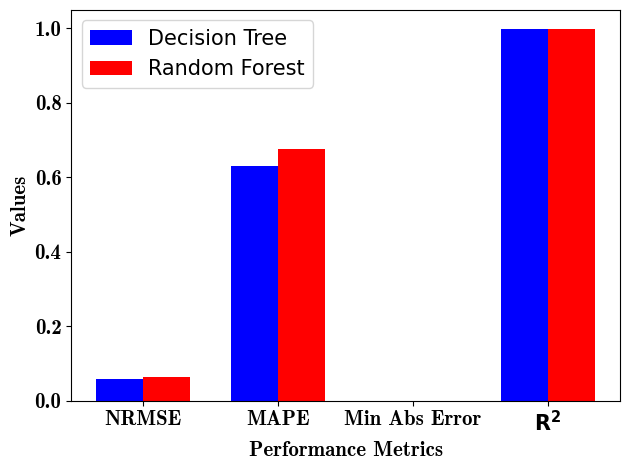

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['NRMSE', 'MAPE', 'Min Abs Error',  r'$\mathbf{R^2}$']
dt_values = [0.0573, 0.6291, 0.0, 0.9988]  # Decision Tree values
rf_values = [0.0624, 0.6767, 0.0, 0.9986]  # Random Forest values

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dt_values, width, label='Decision Tree', color='blue')
rects2 = ax.bar(x + width/2, rf_values, width, label='Random Forest', color='red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
label_font_properties = {'family': 'cmb10', 'size': 15, 'weight': 'bold'}
tick_font_properties = {'family': 'cmb10', 'size': 15, 'weight': 'normal'}

ax.set_ylabel('Values', fontdict=label_font_properties)
ax.set_xlabel('Performance Metrics', fontdict=label_font_properties)
# ax.set_title('Comparison of Decision Tree and Random Forest', fontdict=label_font_properties)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontdict=tick_font_properties)

# Make y-axis labels not bold
ax.set_yticks(np.linspace(0, 1, num=6))  # Set y-ticks to show from 0 to 1
ax.set_yticklabels(['{:.1f}'.format(i) for i in np.linspace(0, 1, num=6)], fontdict=tick_font_properties)

ax.legend(fontsize=15, title_fontsize=18)

fig.tight_layout()

plt.show()
